In [ ]:
#          IMPORTS
# ====================================

import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [ ]:
data = pd.read_csv("/content/dataset.csv")

In [ ]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
data.shape

(6819, 96)

In [ ]:
#       CLEANING DATA
# ==================================

data.columns = [i.title().strip() for i in list(data.columns)]
row = data.shape[0]
col = data.shape[1]

print("The number of rows within the dataset are {} and the number of columns is {}".format(row,col))

The number of rows within the dataset are 6819 and the number of columns is 96


In [ ]:
data.columns

Index(['Bankrupt?', 'Roa(C) Before Interest And Depreciation Before Interest',
       'Roa(A) Before Interest And % After Tax',
       'Roa(B) Before Interest And Depreciation After Tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-Tax Net Interest Rate',
       'After-Tax Net Interest Rate',
       'Non-Industry Income And Expenditure/Revenue',
       'Continuous Interest Rate (After Tax)', 'Operating Expense Rate',
       'Research And Development Expense Rate', 'Cash Flow Rate',
       'Interest-Bearing Debt Interest Rate', 'Tax Rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent Eps In The Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net Profit Before Tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-Tax

In [ ]:
data.isnull().sum().sort_values(ascending=False).head()

Bankrupt?                                                  0
Roa(C) Before Interest And Depreciation Before Interest    0
Total Expense/Assets                                       0
Total Income/Total Expense                                 0
Retained Earnings To Total Assets                          0
dtype: int64

In [ ]:
data.head()

,Bankrupt?,Roa(C) Before Interest And Depreciation Before Interest,Roa(A) Before Interest And % After Tax,Roa(B) Before Interest And Depreciation After Tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-Tax Net Interest Rate,After-Tax Net Interest Rate,Non-Industry Income And Expenditure/Revenue,...,Net Income To Total Assets,Total Assets To Gnp Price,No-Credit Interval,Gross Profit To Sales,Net Income To Stockholder'S Equity,Liability To Equity,Degree Of Financial Leverage (Dfl),Interest Coverage Ratio (Interest Expense To Ebit),Net Income Flag,Equity To Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
data.shape

(6819, 96)

In [ ]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

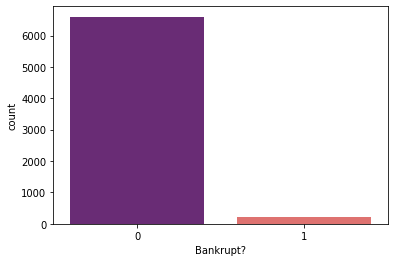

In [ ]:
#               VISUALIZATIONS
# ===========================================================

value = randint(0, len(colors)-1)
sns.countplot('Bankrupt?',data=data,palette = colors[value])

In [ ]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index

data[categorical_features].columns.tolist()

['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']

0    6811
1       8
Name: Liability-Assets Flag, dtype: int64


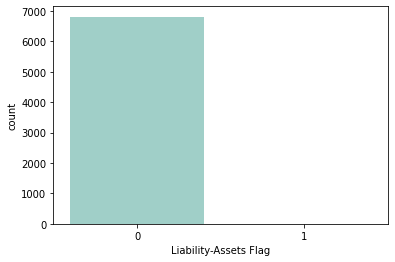

In [ ]:
value = randint(0, len(colors)-1)

print(data['Liability-Assets Flag'].value_counts())
sns.countplot('Liability-Assets Flag',data=data,palette = colors[value])

Liability-Assets Flag  Bankrupt?
0                      0            6597
                       1             214
1                      1               6
                       0               2
dtype: int64


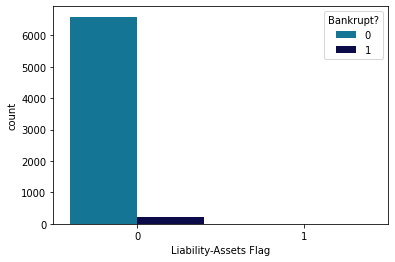

In [ ]:
value = randint(0, len(colors)-1)

print(data[['Liability-Assets Flag','Bankrupt?']].value_counts())
sns.countplot(x = 'Liability-Assets Flag',hue = 'Bankrupt?',data = data,palette = colors[value])

1    6819
Name: Net Income Flag, dtype: int64


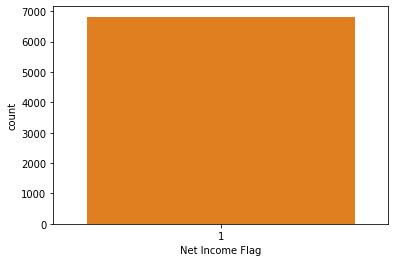

In [ ]:
value = randint(0, len(colors)-1)

print(data['Net Income Flag'].value_counts())
sns.countplot('Net Income Flag',data=data,palette = colors[value])

Net Income Flag  Bankrupt?
1                0            6599
                 1             220
dtype: int64


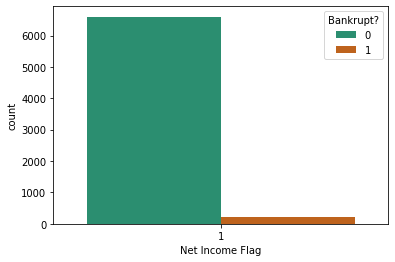

In [ ]:
value = randint(0, len(colors)-1)

print(data[['Net Income Flag','Bankrupt?']].value_counts())
sns.countplot(x = 'Net Income Flag',hue = 'Bankrupt?',data = data,palette = colors[value])

In [ ]:
positive_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values()[:6].index.tolist()

positive_corr = data[positive_corr + ["Bankrupt?"]].copy()
negative_corr = data[negative_corr + ["Bankrupt?"]].copy()

In [ ]:
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,8))
    value = randint(0, len(colors)-1)

    for i in range(1,7):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = data,palette = colors[value])

    plt.tight_layout(pad=0.5)

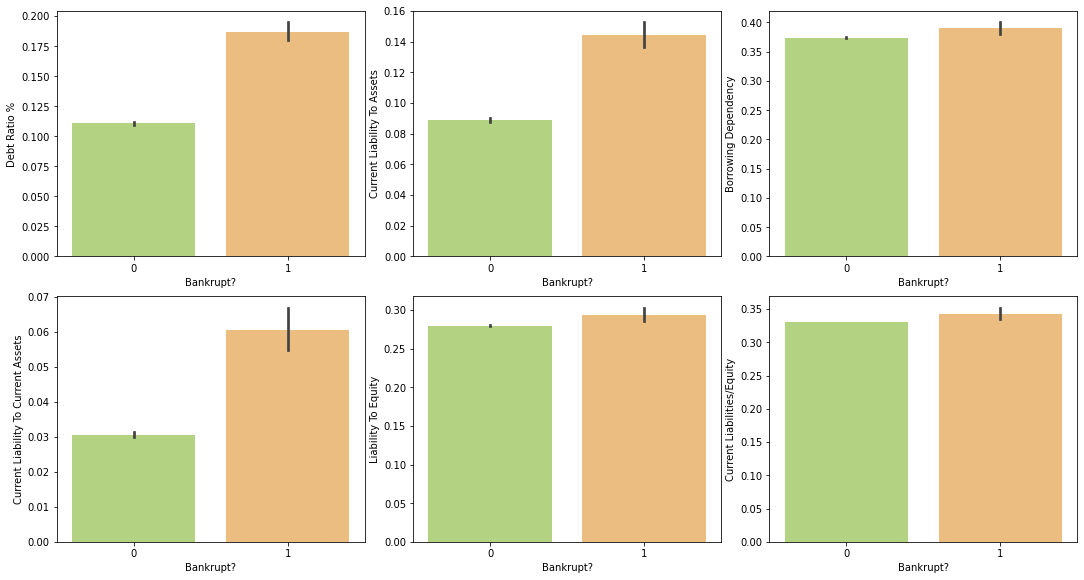

In [ ]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

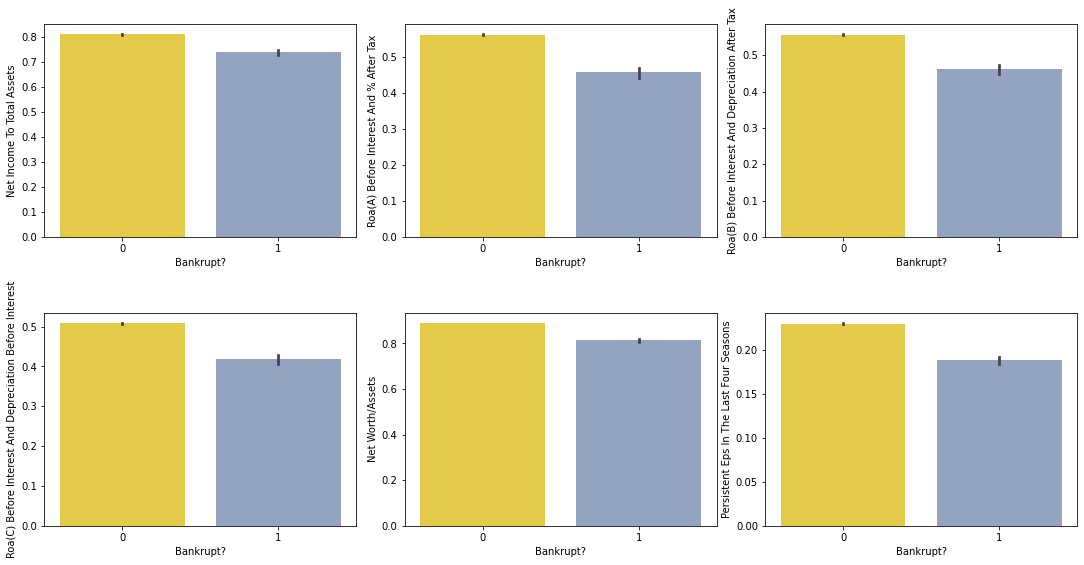

In [ ]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

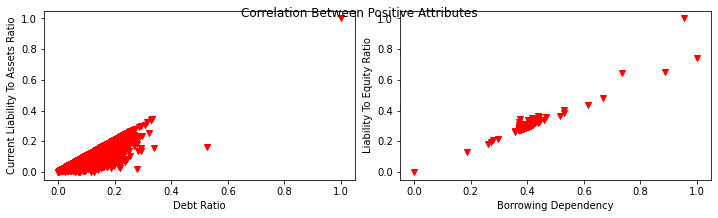

In [ ]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability To Assets Ratio")
plt.scatter(data["Debt Ratio %"],data["Current Liability To Assets"], marker='v',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("Borrowing Dependency")
plt.ylabel("Liability To Equity Ratio")
plt.scatter(data["Borrowing Dependency"],data["Liability To Equity"], marker='v',color = 'red')

plt.tight_layout(pad=0.8)

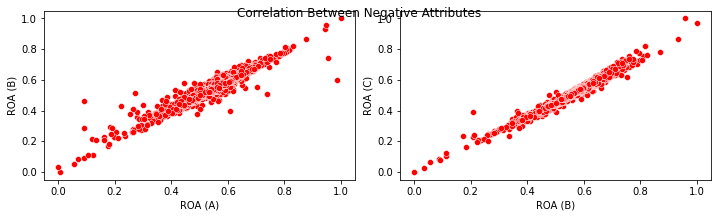

In [ ]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")
sns.scatterplot(data=data, x='Roa(A) Before Interest And % After Tax', y='Roa(B) Before Interest And Depreciation After Tax',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
sns.scatterplot(data=data, x='Roa(B) Before Interest And Depreciation After Tax', y='Roa(C) Before Interest And Depreciation Before Interest',color = 'red')

plt.tight_layout(pad=0.8)

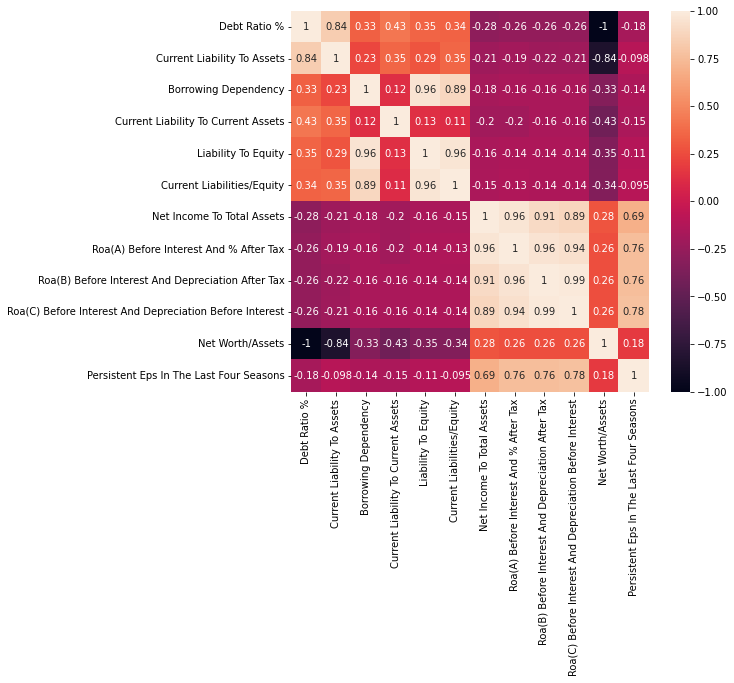

In [ ]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))
sns.heatmap(data[relation].corr(),annot=True)

In [ ]:
#            DATA  MODELING
# ====================================================

numeric_features = data.dtypes[data.dtypes != 'int64'].index
data[numeric_features] = data[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))

data[numeric_features] = data[numeric_features].fillna(0)

In [ ]:
#                WITHOUT FEATURE SELECTION
# =================================================================

Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    data = Dataframe.copy()
    
    X = data.drop('Bankrupt?', axis=1)
    y = data['Bankrupt?']
    
    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
     
    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [ ]:
print("K Nearest Neighbour")
TrainedModel = taining_without_feature_selection({"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), data,"K Nearest Neighbour")
Models = Models.append(TrainedModel,ignore_index=True)

K Nearest Neighbour

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1313
           1       0.67      0.94      0.78        51

    accuracy                           0.98      1364
   macro avg       0.83      0.96      0.89      1364
weighted avg       0.99      0.98      0.98      1364



In [ ]:
print("Logistic Regression")
TrainedModel = taining_without_feature_selection({"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, LogisticRegression(solver='liblinear'), data, "Logistic Regression")
Models = Models.append(TrainedModel,ignore_index=True)

Logistic Regression

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.23      0.82      0.36        51

    accuracy                           0.89      1364
   macro avg       0.61      0.86      0.65      1364
weighted avg       0.96      0.89      0.92      1364



In [ ]:
print("DecisionTree Classifier")
TrainedModel = taining_without_feature_selection({"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}, DecisionTreeClassifier(), data, "DecisionTree Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

DecisionTree Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1313
           1       0.18      0.90      0.31        51

    accuracy                           0.85      1364
   macro avg       0.59      0.87      0.61      1364
weighted avg       0.97      0.85      0.89      1364



In [ ]:
print("Random Forest Classifier")
TrainedModel = taining_without_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), data, "Random Forest Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

Random Forest Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1313
           1       0.81      0.90      0.85        51

    accuracy                           0.99      1364
   macro avg       0.90      0.95      0.92      1364
weighted avg       0.99      0.99      0.99      1364



In [ ]:
print("Support Vector Classifier")
TrainedModel = taining_without_feature_selection({'C': [1,10,20],'kernel': ['rbf','linear']},  SVC(), data, "Support Vector Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

Support Vector Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1313
           1       0.47      0.90      0.62        51

    accuracy                           0.96      1364
   macro avg       0.73      0.93      0.80      1364
weighted avg       0.98      0.96      0.96      1364



In [ ]:
#                 SUMMARY TABLE
# =================================================================

Models.sort_values('F1 score',ascending=False)

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
3,Random Forest Classifier,98.83%,0.81,0.90,0.85,0.95
0,K Nearest Neighbour,98.02%,0.67,0.94,0.78,0.96
4,Support Vector Classifier,95.82%,0.47,0.90,0.62,0.93
1,Logistic Regression,89.22%,0.23,0.82,0.36,0.86
2,DecisionTree Classifier,84.68%,0.18,0.90,0.31,0.87


In [ ]:
#                WITH FEATURE SELECTION
# =================================================================

Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_with_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    data = Dataframe.copy()
    
    X = data.drop('Bankrupt?', axis=1)
    y = data['Bankrupt?']
    
    '''
    Feature Selection Process: 
    class sklearn.feature_selection.SelectKBest(score_func=<function>, k=<number of features>
        score_func - Scoring measure
        k - Total features to be returned 
    '''
    
    fs = SelectKBest(score_func=f_classif, k=int((data.shape[1]*85)/100))

    X = fs.fit_transform(X, y)
    
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)

    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [ ]:
print("Random Forest Classifier")
TrainedModel = taining_with_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), data, "Random Forest Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

Random Forest Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1313
           1       0.81      0.92      0.86        51

    accuracy                           0.99      1364
   macro avg       0.90      0.96      0.93      1364
weighted avg       0.99      0.99      0.99      1364



In [ ]:
print("K Nearest Neighbour")
TrainedModel = taining_with_feature_selection({"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), data,"K Nearest Neighbour")
Models = Models.append(TrainedModel,ignore_index=True)

K Nearest Neighbour

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1313
           1       0.64      0.94      0.76        51

    accuracy                           0.98      1364
   macro avg       0.82      0.96      0.88      1364
weighted avg       0.98      0.98      0.98      1364



In [ ]:
Models.sort_values('F1 score',ascending=False)

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
0,Random Forest Classifier,98.9%,0.81,0.92,0.86,0.96
1,K Nearest Neighbour,97.8%,0.64,0.94,0.76,0.96


,Bankrupt?,Roa(C) Before Interest And Depreciation Before Interest,Roa(A) Before Interest And % After Tax,Roa(B) Before Interest And Depreciation After Tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-Tax Net Interest Rate,After-Tax Net Interest Rate,Non-Industry Income And Expenditure/Revenue,...,Net Income To Total Assets,Total Assets To Gnp Price,No-Credit Interval,Gross Profit To Sales,Net Income To Stockholder'S Equity,Liability To Equity,Degree Of Financial Leverage (Dfl),Interest Coverage Ratio (Interest Expense To Ebit),Net Income Flag,Equity To Liability
0,1,-2.217747,-2.045648,-2.400185,-0.383306,-0.382610,0.016455,-0.023514,-0.020163,-0.087472,...,-2.254152,-0.049487,-0.084268,-0.383437,-0.861548,0.680121,-0.060026,-0.098971,1,-0.622022
1,1,-0.673779,-0.311045,-0.598406,0.135058,0.136297,0.014669,0.014798,0.015965,-0.005956,...,-0.309011,-0.049487,-0.021387,0.135243,-0.029802,0.240667,15.128707,0.364532,1,-0.535534
2,1,-1.303576,-0.908353,-1.319813,-0.383731,-0.388148,0.007857,-0.061107,-0.051179,-0.142227,...,-0.820449,-0.049487,-0.005984,-0.383670,-0.249802,0.679197,-0.062957,-0.125006,1,-0.621914
3,1,-1.735759,-1.636089,-1.556226,-1.441312,-1.441726,-0.004257,-0.017312,-0.008676,-0.024490,...,-1.691098,-0.049487,-0.080220,-1.441420,-0.392835,0.093758,-0.053899,-0.052558,1,-0.471791
4,1,-0.661729,-0.307722,-0.508013,-0.541198,-0.540668,0.016757,0.013702,0.016185,-0.013253,...,-0.315985,-0.049487,-0.032050,-0.541215,-0.029562,-0.128005,-0.178024,0.776338,1,-0.241697


0    6599
1     220
Name: Bankrupt?, dtype: int64

ValueError: ignored